In [1]:
import pickle
import warnings
import matplotlib
import catppuccin
import numpy as np
import pandas as pd
import seaborn as sns
from halo import Halo
import matplotlib.pyplot as plt
from scipy.stats import randint, uniform
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder

warnings.filterwarnings("ignore")
matplotlib.style.use(["dark_background", catppuccin.PALETTE.mocha.identifier])
%matplotlib inline

In [2]:
df = pd.read_csv("data.csv")
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


# Exploratory Data Analysis


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


In [4]:
df.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,190555.000000,38.822584,0.997869,26.388807,0.458210,30564.389581,112.034295,154.347397,0.122563
std,110016.836208,15.511611,0.046110,13.229888,0.498251,17213.155057,54.203995,83.671304,0.327936
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,95278.000000,25.000000,1.000000,15.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,190555.000000,36.000000,1.000000,28.000000,0.000000,31669.000000,133.000000,154.000000,0.000000
75%,285832.000000,49.000000,1.000000,35.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
max,381109.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


In [5]:
df.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

In [6]:
df.shape

(381109, 12)

In [7]:
df.drop_duplicates(
    keep="first",
    inplace=True,
)
df.shape

(381109, 12)

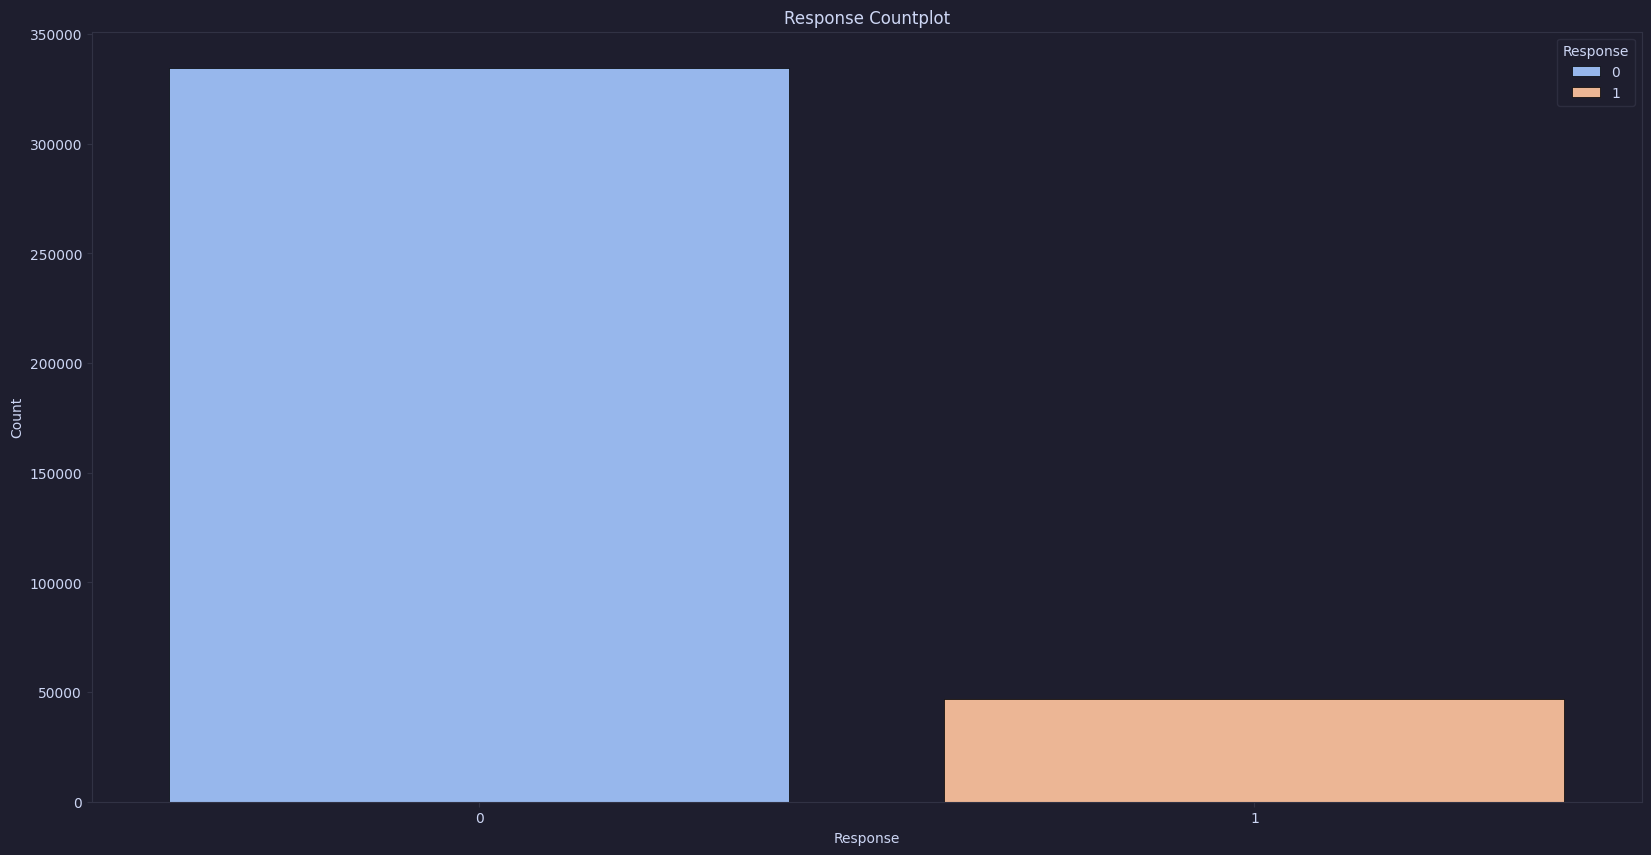

In [8]:
plt.figure(figsize=(20, 10))
sns.countplot(
    data=df,
    x="Response",
    hue="Response",
    edgecolor="black",
    linewidth=0.5,
)
plt.title("Response Countplot")
plt.xlabel("Response")
plt.ylabel("Count")
plt.show()

In [9]:
df["age_groups"] = pd.cut(
    df["Age"],
    bins=[20, 30, 55, 100],
    labels=["Adults", "Mature", "Seniors"],
)

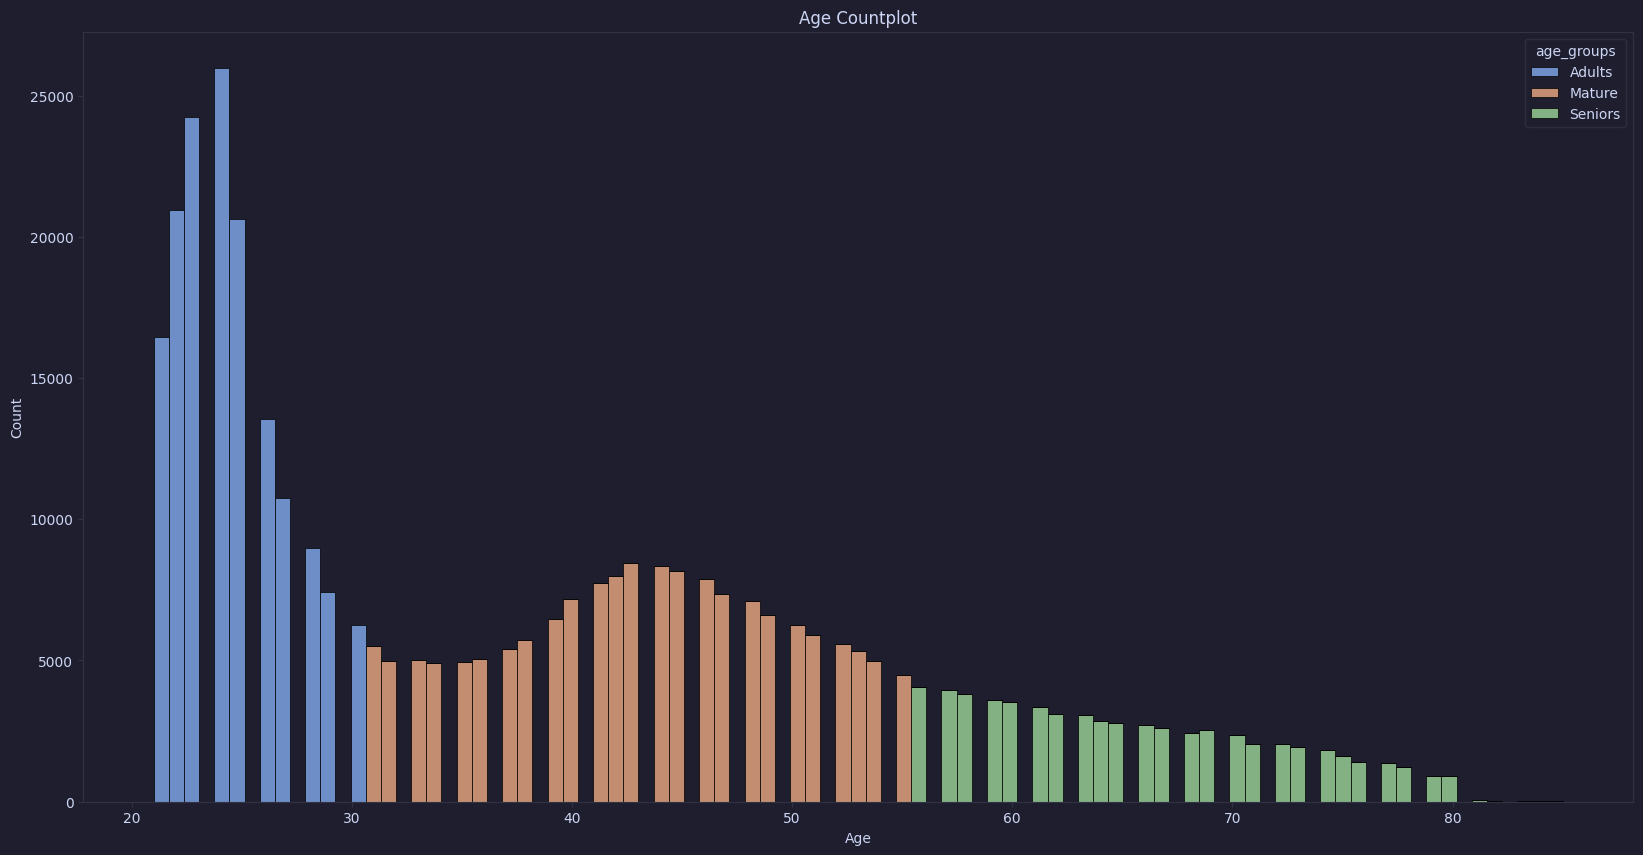

In [10]:
plt.figure(figsize=(20, 10))
sns.histplot(
    data=df,
    x="Age",
    hue="age_groups",
    edgecolor="black",
    linewidth=0.5,
    multiple="stack",
)
plt.title("Age Countplot")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

In [11]:
df.drop(columns=["age_groups"], inplace=True)

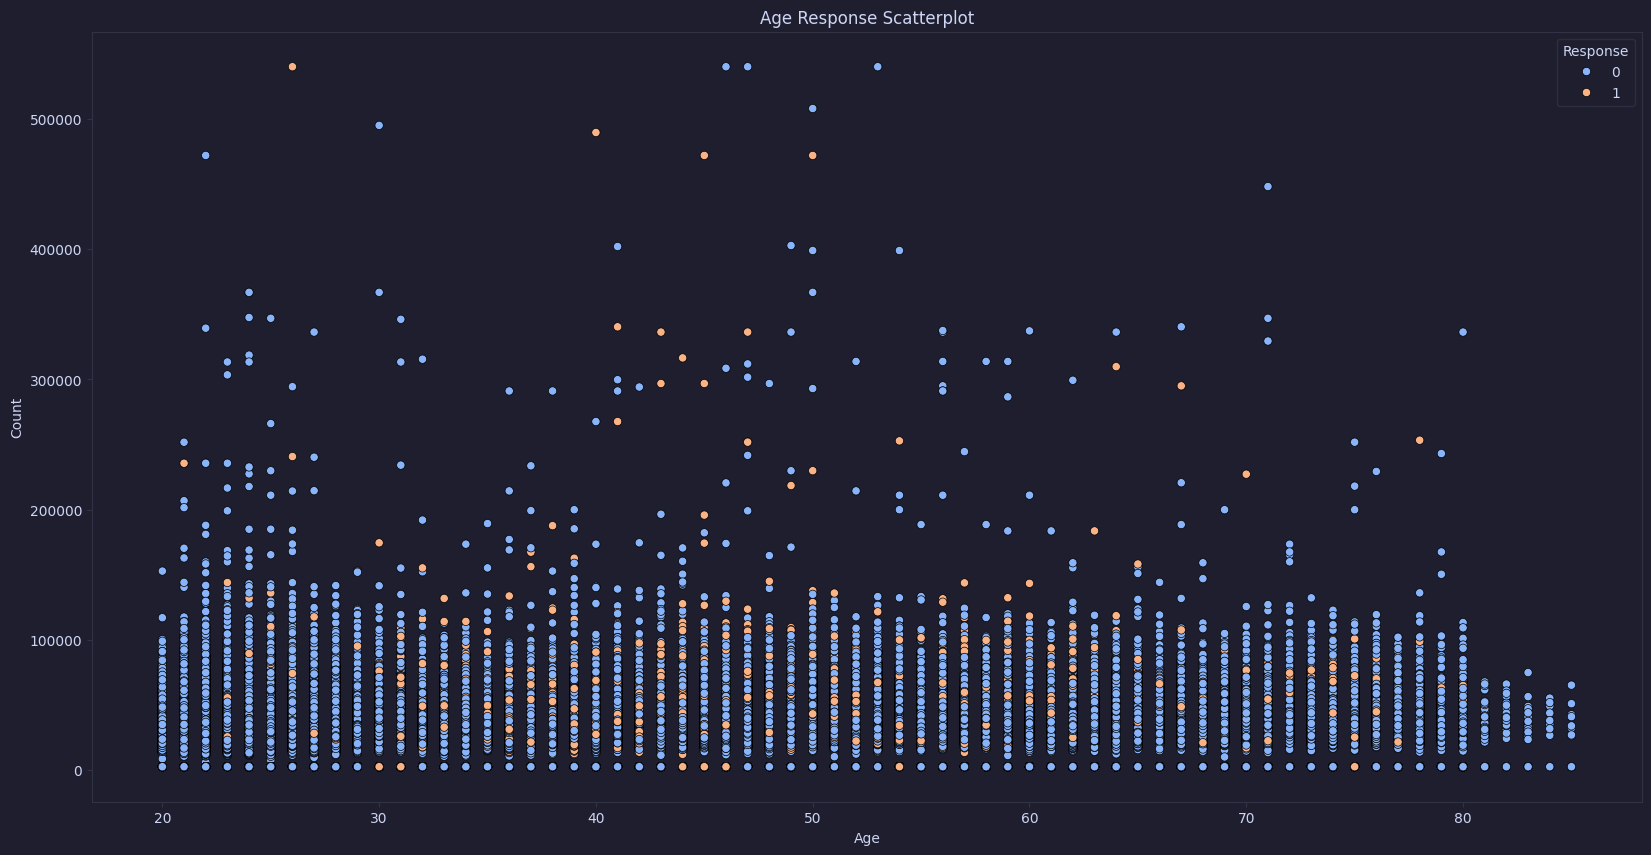

In [12]:
plt.figure(figsize=(20, 10))
sns.scatterplot(
    data=df,
    x="Age",
    y="Annual_Premium",
    hue="Response",
    edgecolor="black",
    linewidth=0.5,
)
plt.title("Age Response Scatterplot")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

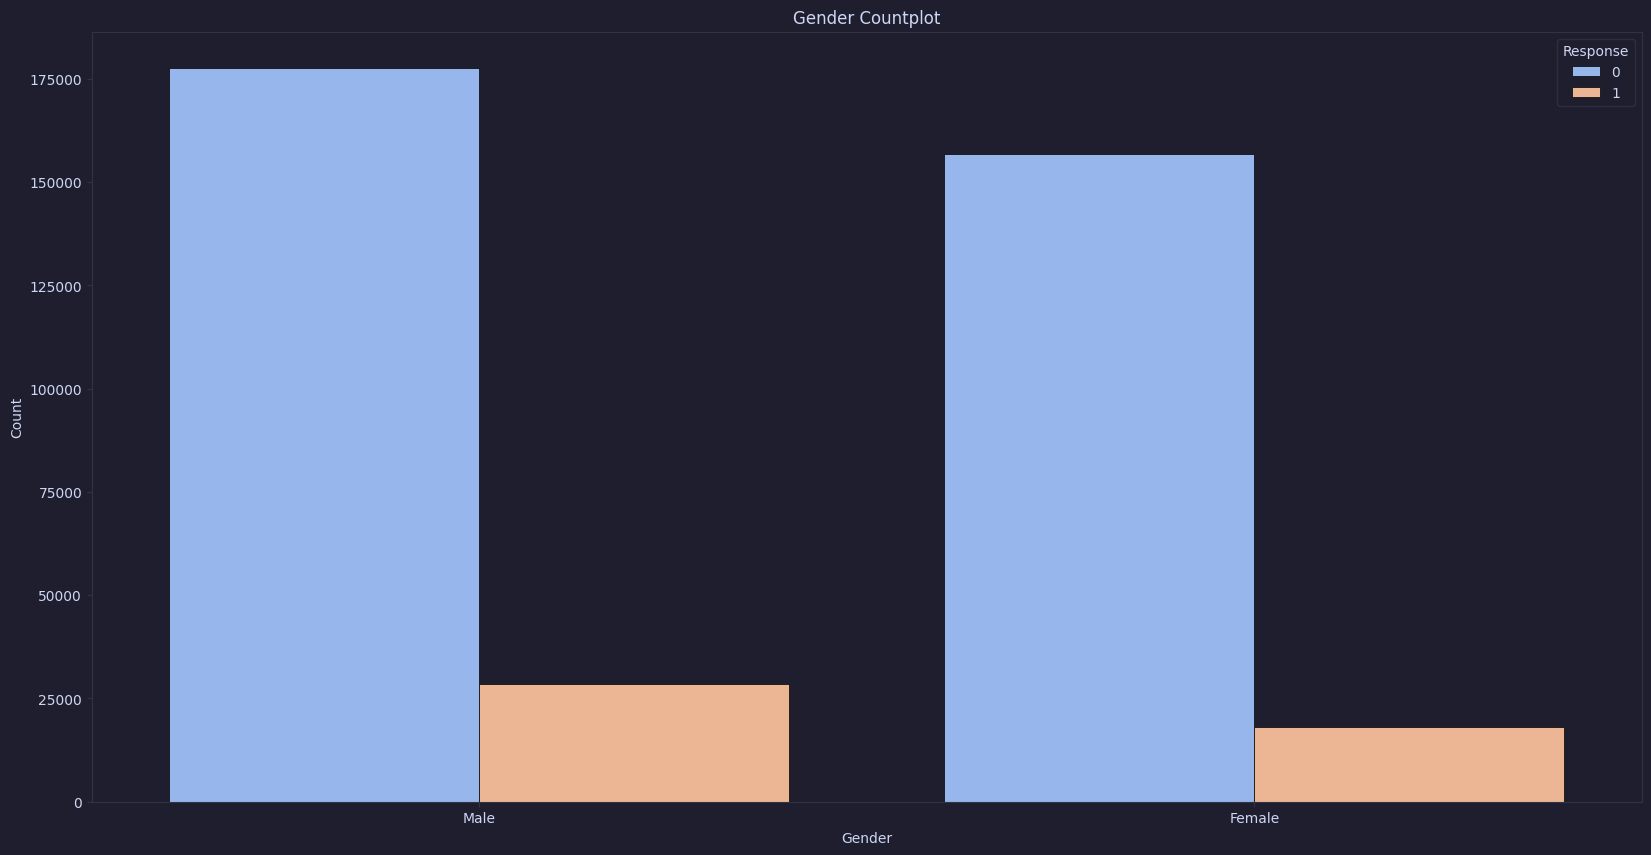

In [13]:
plt.figure(figsize=(20, 10))
sns.countplot(data=df, x="Gender", hue="Response", edgecolor="black", linewidth=0.5)
plt.title("Gender Countplot")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()

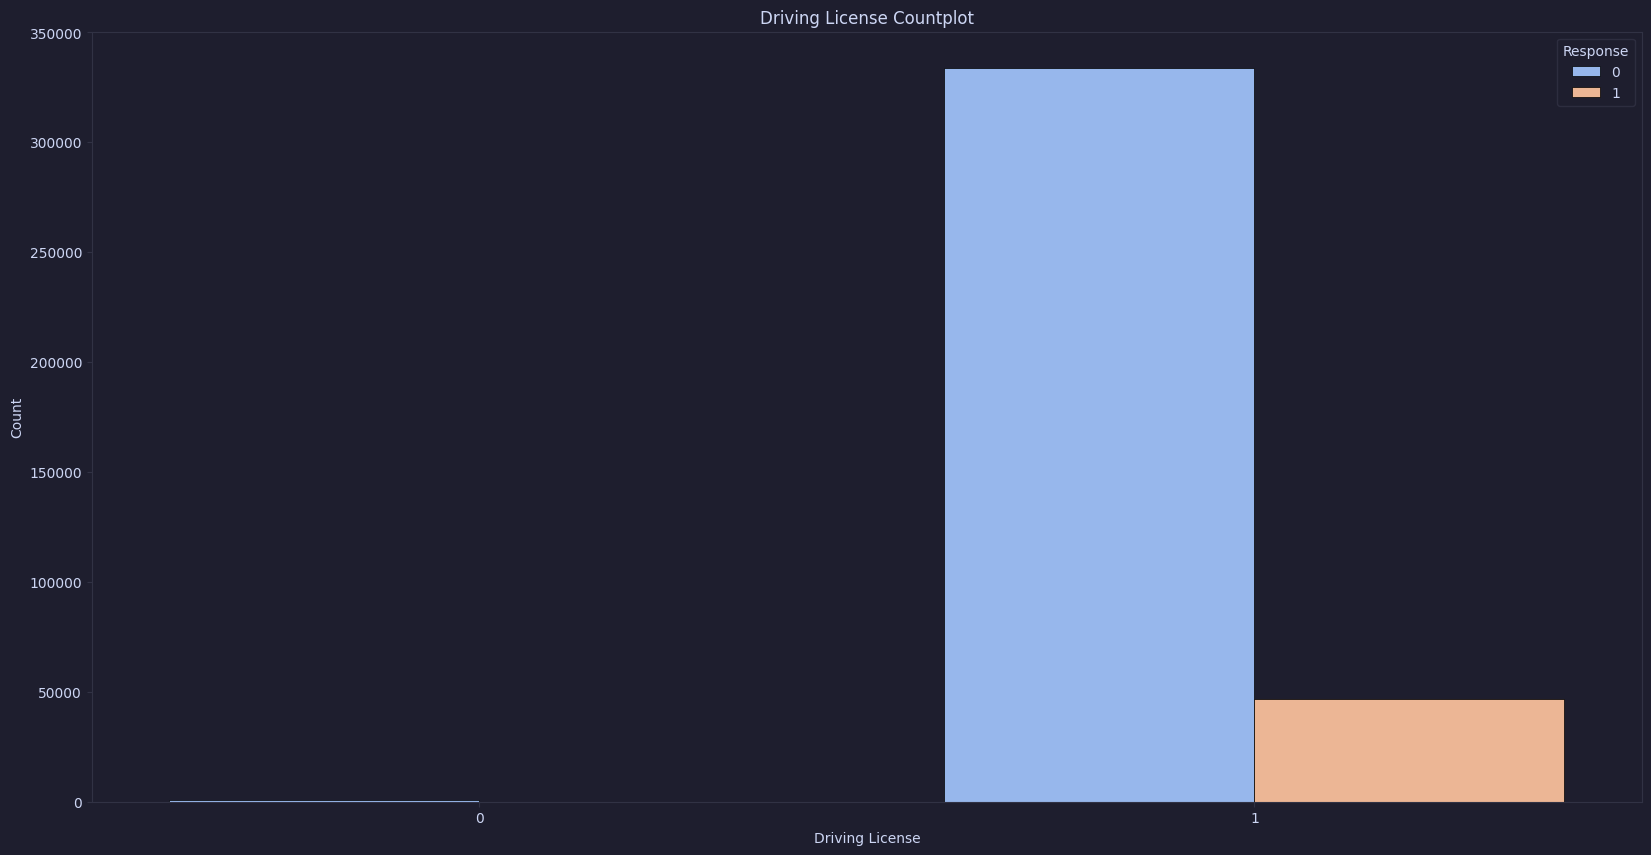

In [14]:
plt.figure(figsize=(20, 10))
sns.countplot(
    data=df, x="Driving_License", hue="Response", edgecolor="black", linewidth=0.5
)
plt.title("Driving License Countplot")
plt.xlabel("Driving License")
plt.ylabel("Count")
plt.show()

In [15]:
license_holders = df[df["Driving_License"] == 1]
license_holders

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...
381104,381105,Male,74,1,26.0,1,1-2 Year,No,30170.0,26.0,88,0
381105,381106,Male,30,1,37.0,1,< 1 Year,No,40016.0,152.0,131,0
381106,381107,Male,21,1,30.0,1,< 1 Year,No,35118.0,160.0,161,0
381107,381108,Female,68,1,14.0,0,> 2 Years,Yes,44617.0,124.0,74,0


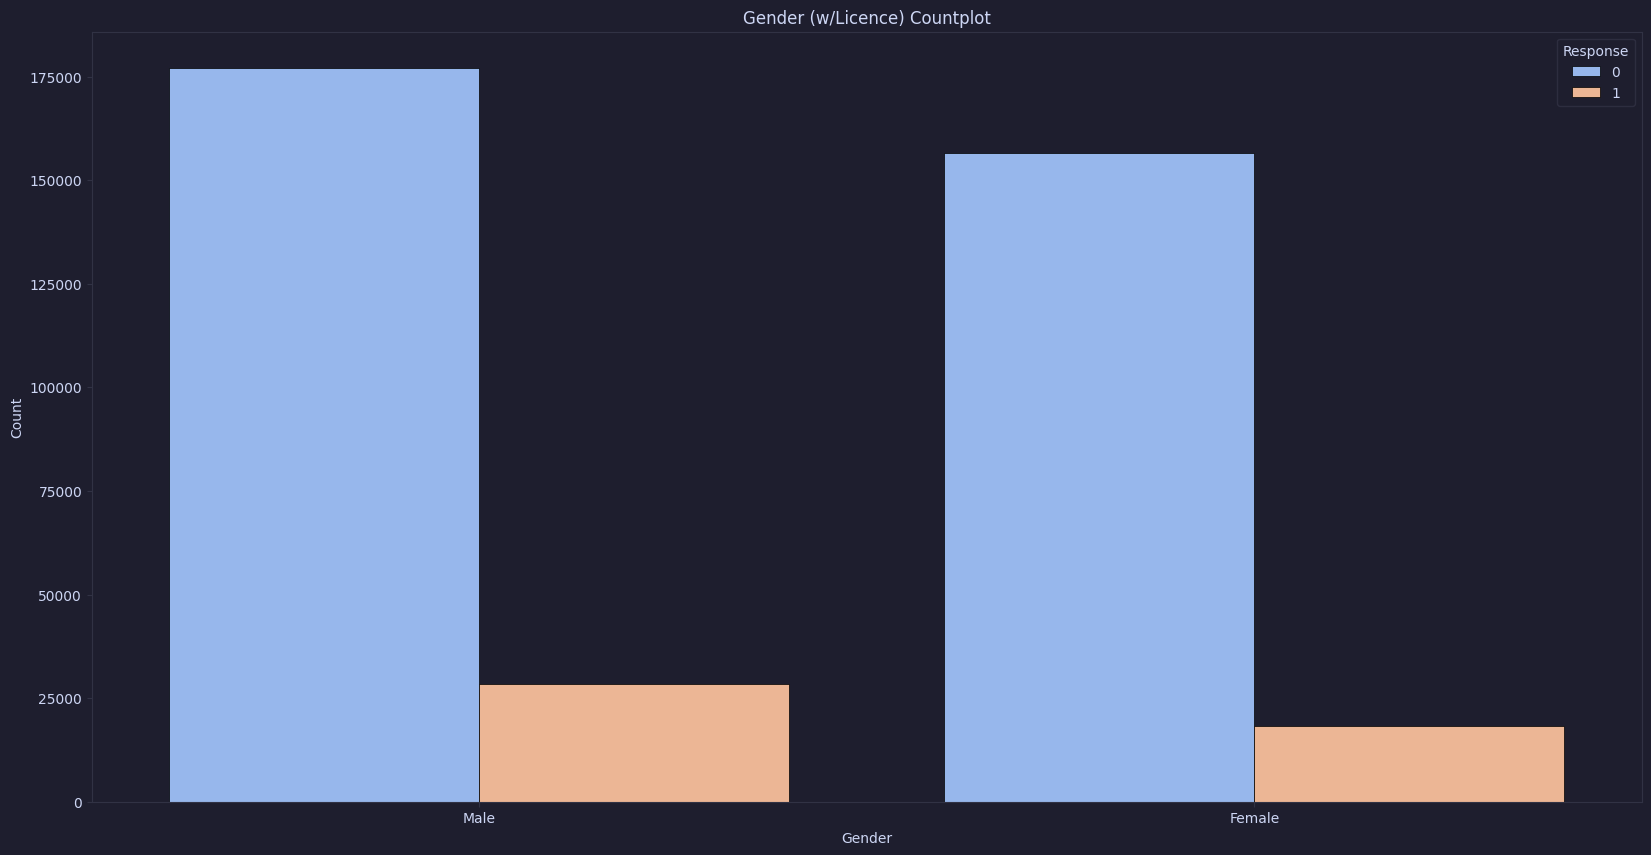

In [16]:
plt.figure(figsize=(20, 10))
sns.countplot(
    data=license_holders,
    x="Gender",
    hue="Response",
    edgecolor="black",
    linewidth=0.5,
)
plt.title("Gender (w/Licence) Countplot")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()

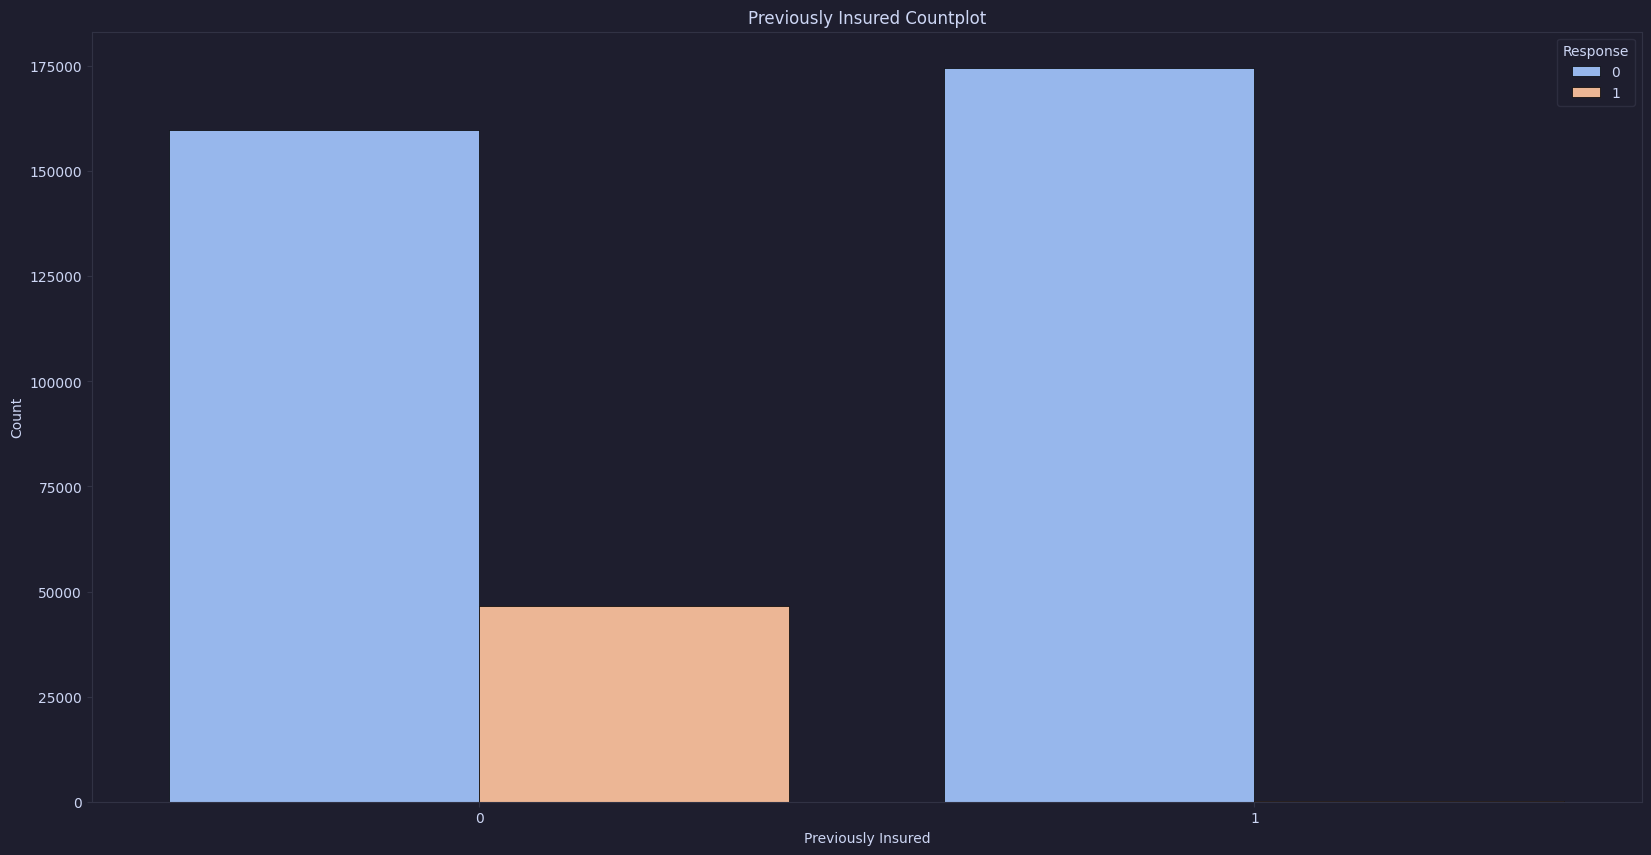

In [17]:
plt.figure(figsize=(20, 10))
sns.countplot(
    data=df,
    x="Previously_Insured",
    hue="Response",
    edgecolor="black",
    linewidth=0.5,
)
plt.title("Previously Insured Countplot")
plt.xlabel("Previously Insured")
plt.ylabel("Count")
plt.show()

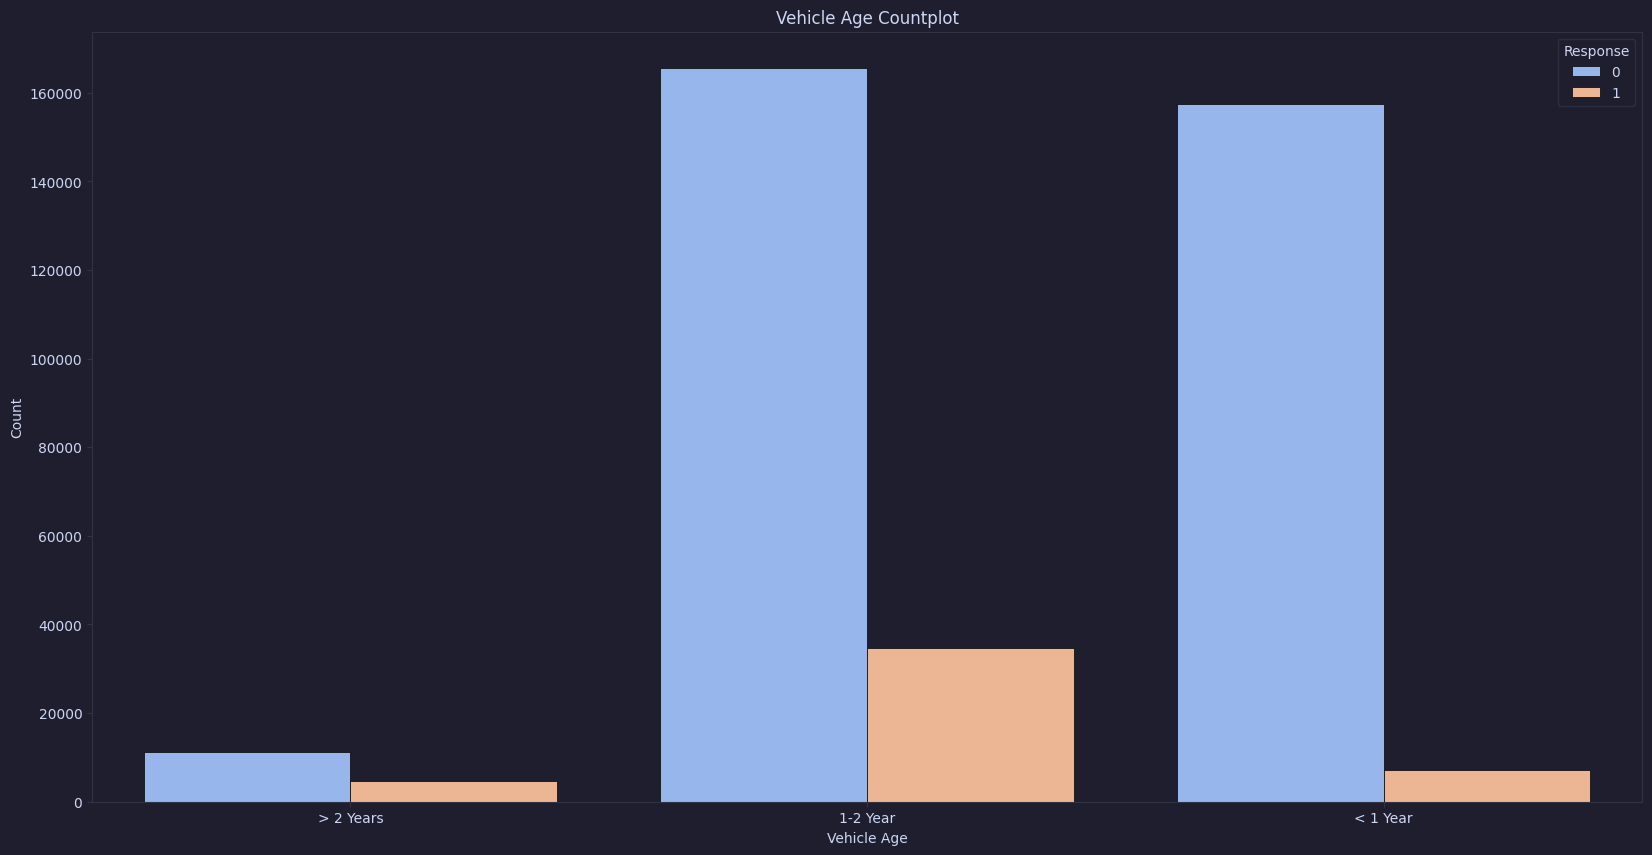

In [18]:
plt.figure(figsize=(20, 10))
sns.countplot(
    data=df,
    x="Vehicle_Age",
    hue="Response",
    edgecolor="black",
    linewidth=0.5,
)
plt.title("Vehicle Age Countplot")
plt.xlabel("Vehicle Age")
plt.ylabel("Count")
plt.show()

In [19]:
vehicle_age_groups = (
    df.groupby(["Vehicle_Age", "Response"]).size().reset_index(name="count")
)

vehicle_age_groups

,Vehicle_Age,Response,count
0,1-2 Year,0,165510
1,1-2 Year,1,34806
2,< 1 Year,0,157584
3,< 1 Year,1,7202
4,> 2 Years,0,11305
5,> 2 Years,1,4702


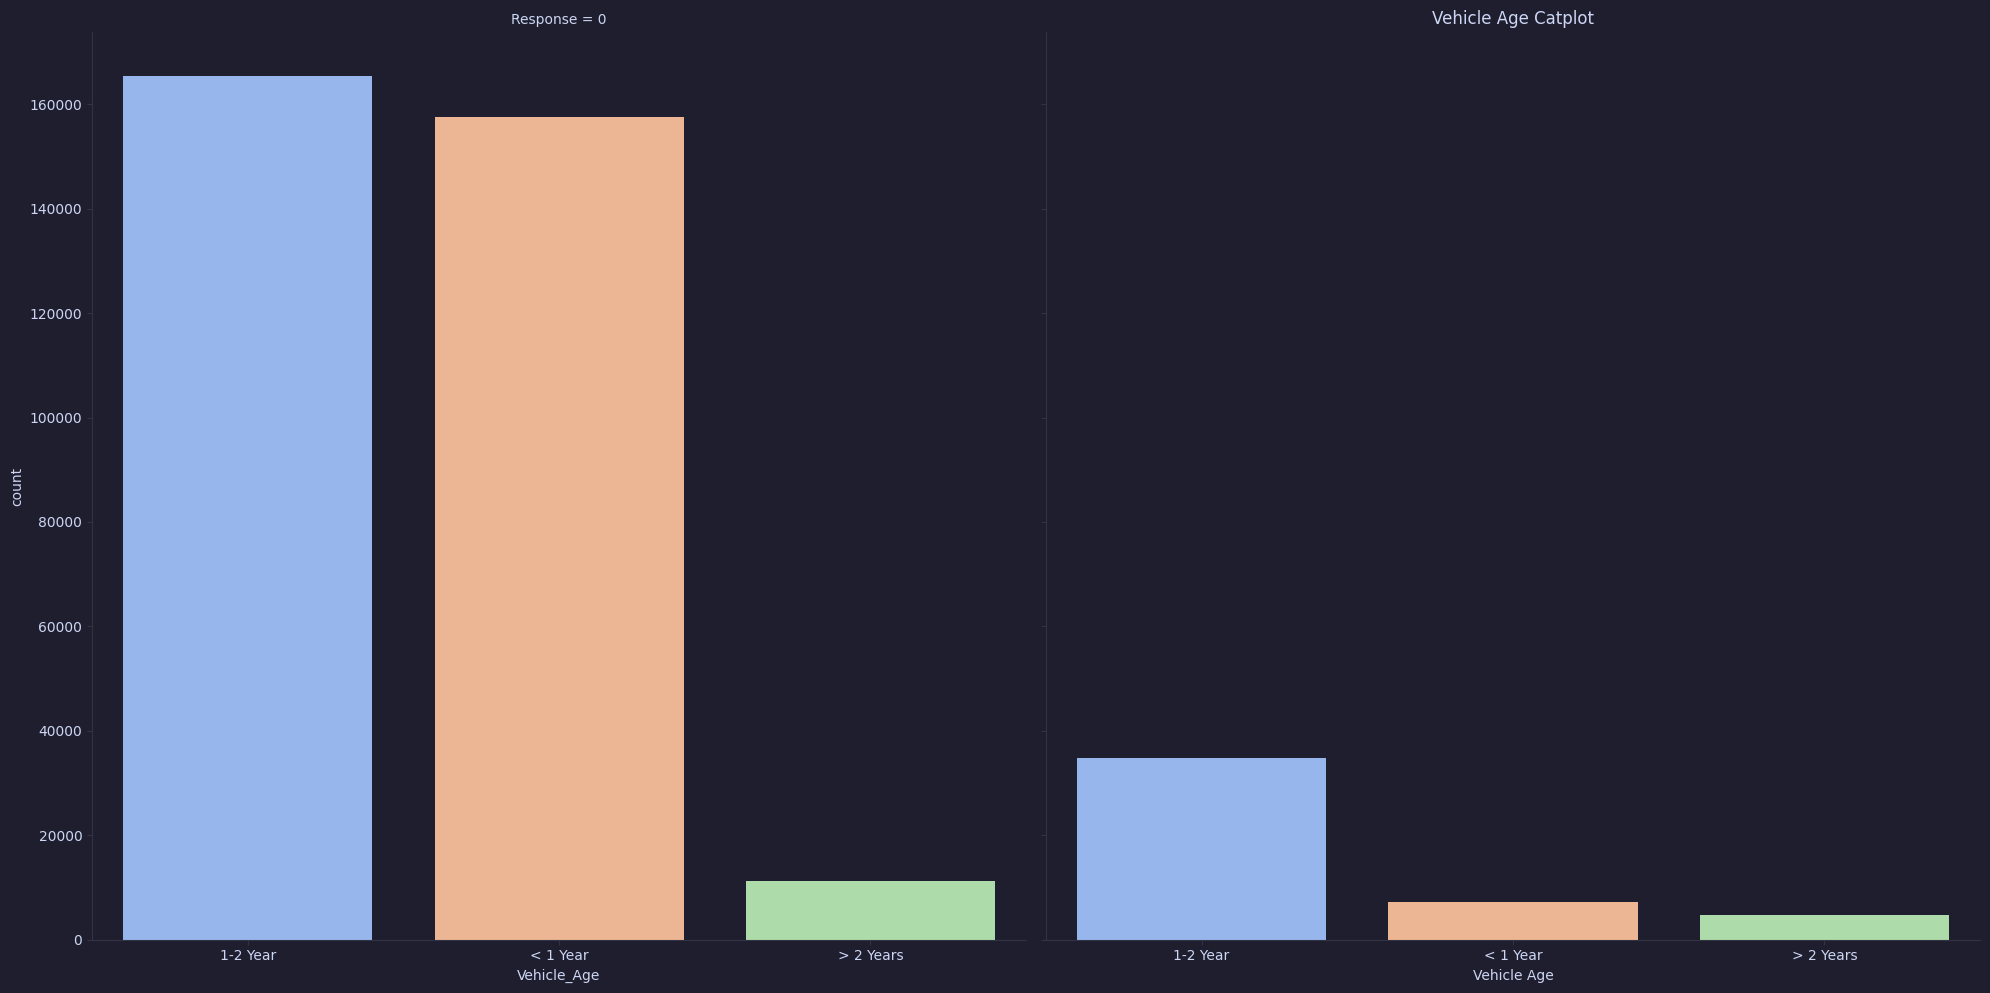

In [20]:
sns.catplot(
    data=vehicle_age_groups,
    x="Vehicle_Age",
    y="count",
    col="Response",
    hue="Vehicle_Age",
    kind="bar",
    legend=False,
    height=10,
)

plt.title("Vehicle Age Catplot")
plt.xlabel("Vehicle Age")
plt.ylabel("Count")
plt.show()

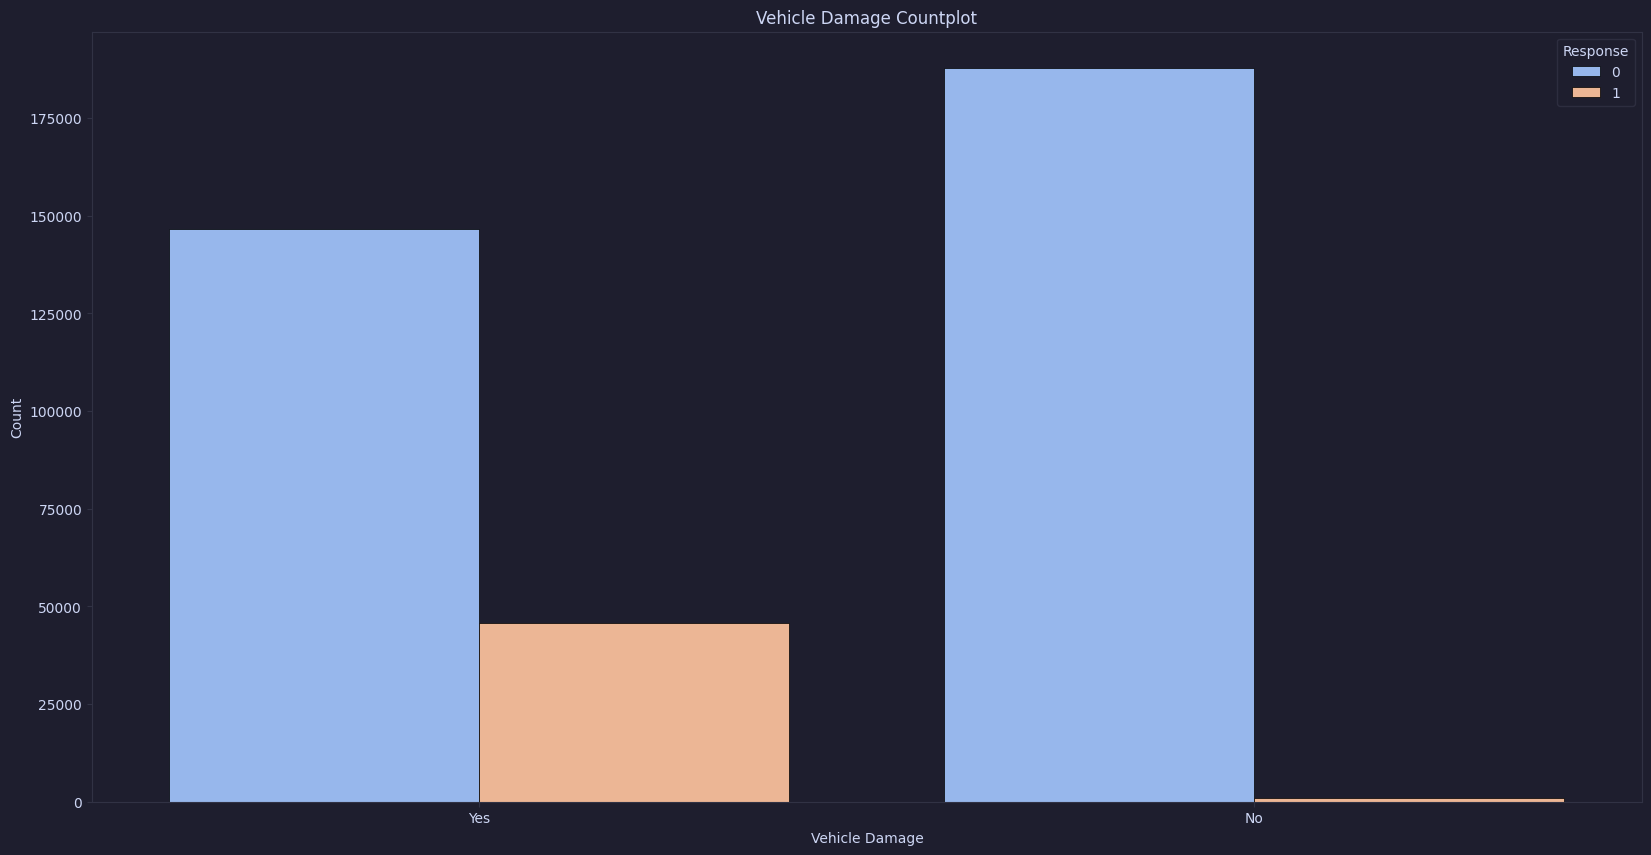

In [21]:
plt.figure(figsize=(20, 10))
sns.countplot(
    data=df,
    x="Vehicle_Damage",
    hue="Response",
    edgecolor="black",
    linewidth=0.5,
)
plt.title("Vehicle Damage Countplot")
plt.xlabel("Vehicle Damage")
plt.ylabel("Count")
plt.show()

In [22]:
vehicle_damage_groups = (
    df.groupby(["Vehicle_Damage", "Response"]).size().reset_index(name="count")
)
vehicle_damage_groups

,Vehicle_Damage,Response,count
0,No,0,187714
1,No,1,982
2,Yes,0,146685
3,Yes,1,45728


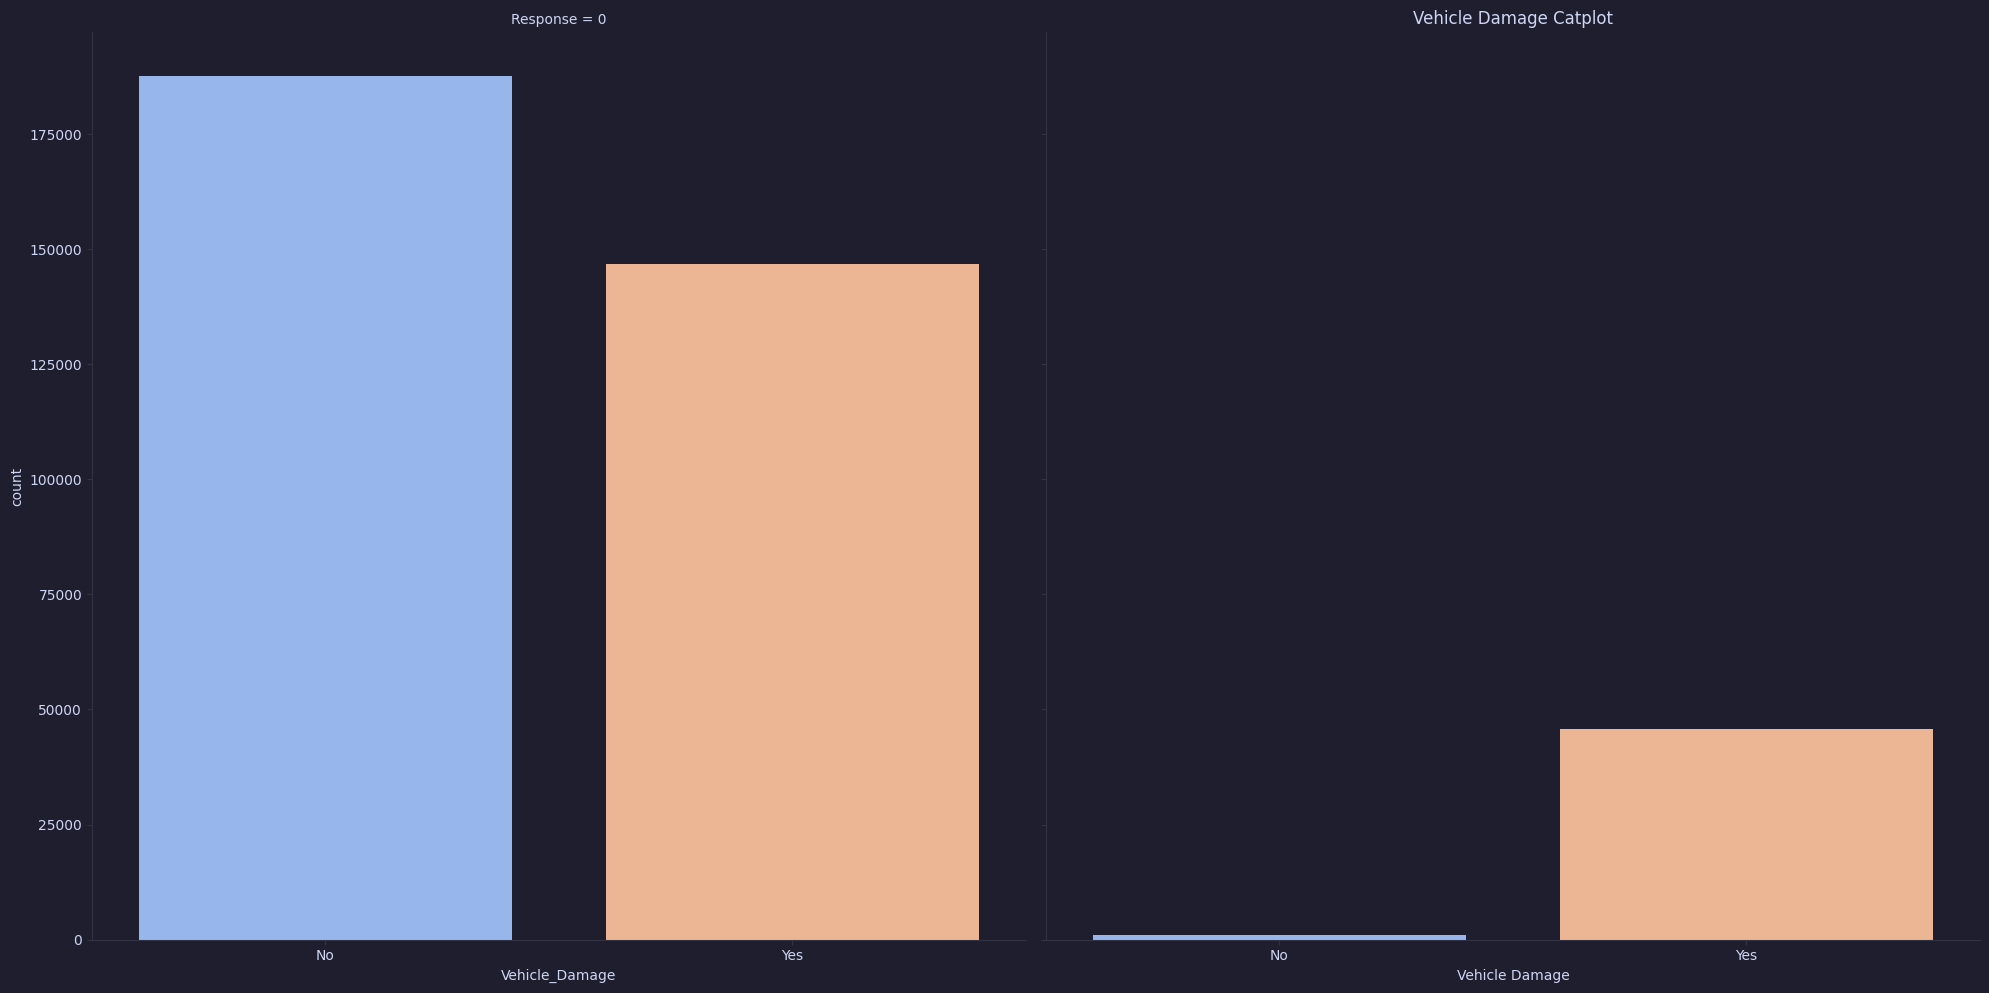

In [23]:
sns.catplot(
    data=vehicle_damage_groups,
    x="Vehicle_Damage",
    y="count",
    col="Response",
    hue="Vehicle_Damage",
    kind="bar",
    legend=False,
    height=10,
)

plt.title("Vehicle Damage Catplot")
plt.xlabel("Vehicle Damage")
plt.ylabel("Count")
plt.show()

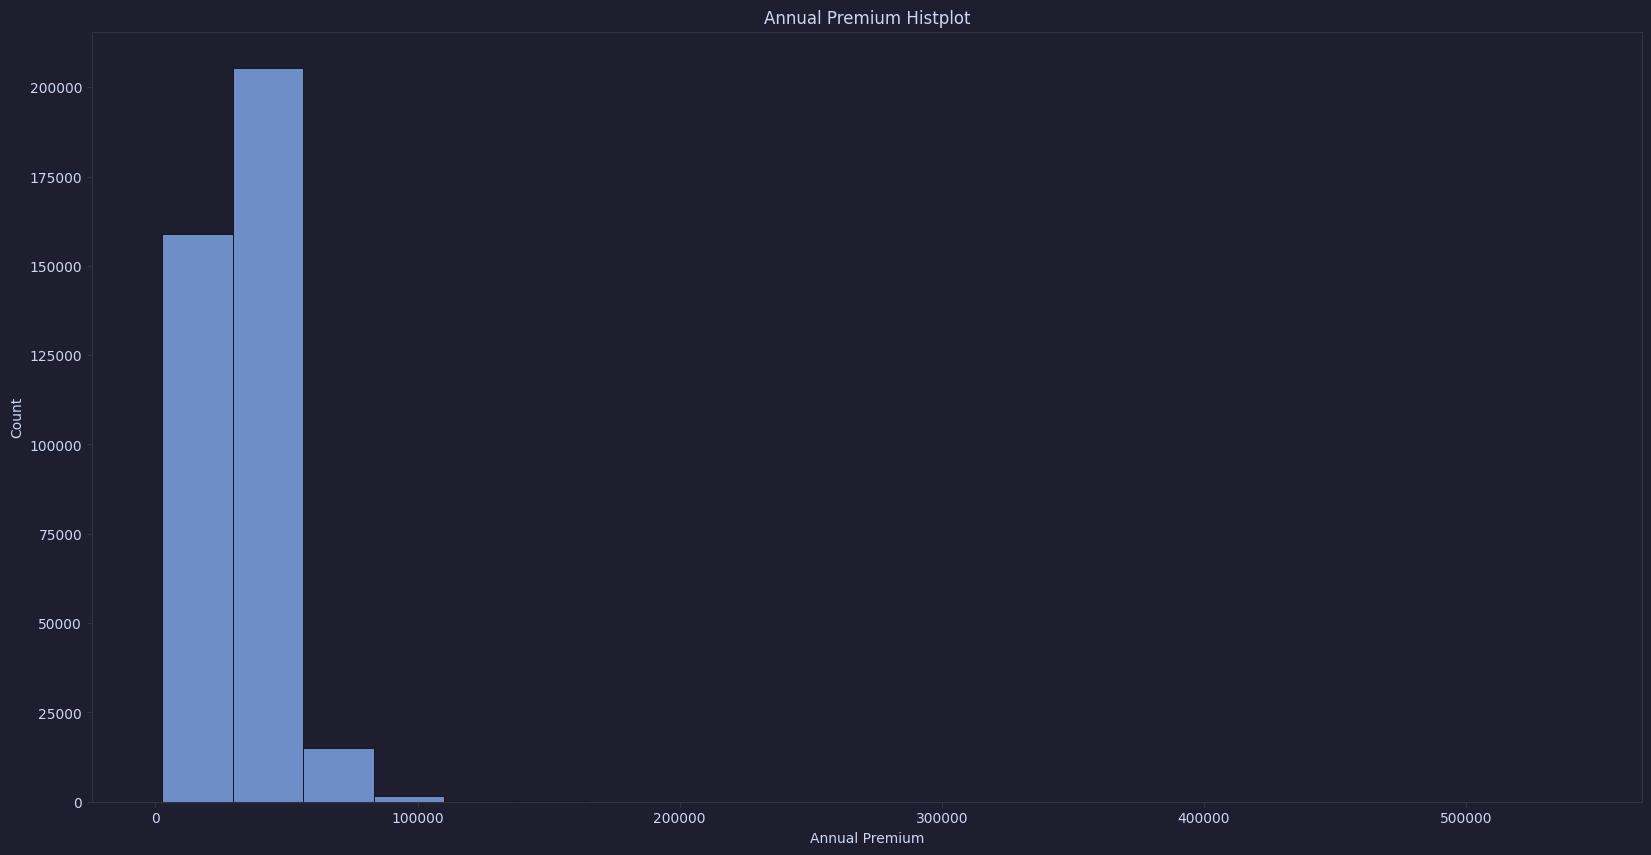

In [24]:
plt.figure(figsize=(20, 10))
sns.histplot(
    data=df,
    x="Annual_Premium",
    bins=20,
    edgecolor="black",
    linewidth=0.5,
    multiple="stack",
)
plt.title("Annual Premium Histplot")
plt.xlabel("Annual Premium")
plt.ylabel("Count")
plt.show()

In [25]:
df[df["Annual_Premium"] > 200000]

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
1412,1413,Female,41,1,28.0,0,1-2 Year,Yes,267698.0,124.0,63,1
11319,11320,Female,50,1,46.0,1,1-2 Year,No,508073.0,26.0,192,0
13426,13427,Female,47,1,28.0,0,1-2 Year,Yes,301762.0,124.0,22,0
15024,15025,Female,32,1,28.0,0,1-2 Year,Yes,315565.0,155.0,150,0
25532,25533,Male,50,1,28.0,0,1-2 Year,Yes,229935.0,122.0,64,1
...,...,...,...,...,...,...,...,...,...,...,...,...
368263,368264,Female,25,1,28.0,1,< 1 Year,Yes,346982.0,124.0,74,0
371910,371911,Female,23,1,37.0,1,< 1 Year,No,235683.0,152.0,246,0
372492,372493,Male,46,1,18.0,0,1-2 Year,No,220581.0,26.0,210,0
373415,373416,Male,56,1,28.0,0,1-2 Year,No,337573.0,26.0,239,0


# Data Preprocessing


In [26]:
df.drop(columns=["id"], inplace=True, axis=1)

In [27]:
le = LabelEncoder()
df["Vehicle_Damage"] = le.fit_transform(df["Vehicle_Damage"])
df["Gender"] = le.fit_transform(df["Gender"])

In [28]:
df["Vehicle_Age"].value_counts()

Vehicle_Age
1-2 Year     200316
< 1 Year     164786
> 2 Years     16007
Name: count, dtype: int64

In [29]:
oh_enocder = OneHotEncoder(sparse_output=False, handle_unknown="ignore")

vehicle_age_encoded = oh_enocder.fit_transform(df[["Vehicle_Age"]])
vehicle_age_cols = oh_enocder.get_feature_names_out(["Vehicle_Age"])

vehicle_age_df = pd.DataFrame(
    vehicle_age_encoded, columns=vehicle_age_cols, index=df.index
).astype(int)

df = pd.concat(
    [
        df.drop(columns=["Vehicle_Age"]),
        vehicle_age_df.drop(columns=["Vehicle_Age_1-2 Year"]),
    ],
    axis=1,
)

cols = [col for col in df.columns if col != "Response"] + ["Response"]
df = df[cols]

df

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years,Response
0,1,44,1,28.0,0,1,40454.0,26.0,217,0,1,1
1,1,76,1,3.0,0,0,33536.0,26.0,183,0,0,0
2,1,47,1,28.0,0,1,38294.0,26.0,27,0,1,1
3,1,21,1,11.0,1,0,28619.0,152.0,203,1,0,0
4,0,29,1,41.0,1,0,27496.0,152.0,39,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
381104,1,74,1,26.0,1,0,30170.0,26.0,88,0,0,0
381105,1,30,1,37.0,1,0,40016.0,152.0,131,1,0,0
381106,1,21,1,30.0,1,0,35118.0,160.0,161,1,0,0
381107,0,68,1,14.0,0,1,44617.0,124.0,74,0,1,0


In [30]:
df.rename(
    columns={
        "Vehicle_Age_< 1 Year": "Vehicle_Age_lt_1_Year",
        "Vehicle_Age_> 2 Years": "Vehicle_Age_gt_2_Years",
    },
    inplace=True,
)
df

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Vehicle_Age_lt_1_Year,Vehicle_Age_gt_2_Years,Response
0,1,44,1,28.0,0,1,40454.0,26.0,217,0,1,1
1,1,76,1,3.0,0,0,33536.0,26.0,183,0,0,0
2,1,47,1,28.0,0,1,38294.0,26.0,27,0,1,1
3,1,21,1,11.0,1,0,28619.0,152.0,203,1,0,0
4,0,29,1,41.0,1,0,27496.0,152.0,39,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
381104,1,74,1,26.0,1,0,30170.0,26.0,88,0,0,0
381105,1,30,1,37.0,1,0,40016.0,152.0,131,1,0,0
381106,1,21,1,30.0,1,0,35118.0,160.0,161,1,0,0
381107,0,68,1,14.0,0,1,44617.0,124.0,74,0,1,0


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Gender                  381109 non-null  int64  
 1   Age                     381109 non-null  int64  
 2   Driving_License         381109 non-null  int64  
 3   Region_Code             381109 non-null  float64
 4   Previously_Insured      381109 non-null  int64  
 5   Vehicle_Damage          381109 non-null  int64  
 6   Annual_Premium          381109 non-null  float64
 7   Policy_Sales_Channel    381109 non-null  float64
 8   Vintage                 381109 non-null  int64  
 9   Vehicle_Age_lt_1_Year   381109 non-null  int64  
 10  Vehicle_Age_gt_2_Years  381109 non-null  int64  
 11  Response                381109 non-null  int64  
dtypes: float64(3), int64(9)
memory usage: 34.9 MB


In [32]:
float_cols = df.select_dtypes(include=["float"])

for col in float_cols:
    df[col] = df[col].astype(int)

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                  Non-Null Count   Dtype
---  ------                  --------------   -----
 0   Gender                  381109 non-null  int64
 1   Age                     381109 non-null  int64
 2   Driving_License         381109 non-null  int64
 3   Region_Code             381109 non-null  int64
 4   Previously_Insured      381109 non-null  int64
 5   Vehicle_Damage          381109 non-null  int64
 6   Annual_Premium          381109 non-null  int64
 7   Policy_Sales_Channel    381109 non-null  int64
 8   Vintage                 381109 non-null  int64
 9   Vehicle_Age_lt_1_Year   381109 non-null  int64
 10  Vehicle_Age_gt_2_Years  381109 non-null  int64
 11  Response                381109 non-null  int64
dtypes: int64(12)
memory usage: 34.9 MB


In [34]:
normalizer = MinMaxScaler()
df["Annual_Premium"] = np.round(normalizer.fit_transform(df[["Annual_Premium"]]))

In [35]:
scaler = StandardScaler()
cols = [col for col in df.columns if col != "Annual_Premium" and col != "Response"]

df[cols] = np.round(scaler.fit_transform(df[cols]), 5)
df

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Vehicle_Age_lt_1_Year,Vehicle_Age_gt_2_Years,Response
0,0.92154,0.33378,0.04621,0.12178,-0.91964,0.99029,0.0,-1.58723,0.74880,-0.87279,4.77587,1
1,0.92154,2.39675,0.04621,-1.76788,-0.91964,-1.00980,0.0,-1.58723,0.34244,-0.87279,-0.20939,0
2,0.92154,0.52718,0.04621,0.12178,-0.91964,0.99029,0.0,-1.58723,-1.52200,-0.87279,4.77587,1
3,0.92154,-1.14898,0.04621,-1.16319,1.08738,-1.00980,0.0,0.73732,0.58147,1.14575,-0.20939,0
4,-1.08513,-0.63324,0.04621,1.10441,1.08738,-1.00980,0.0,0.73732,-1.37858,1.14575,-0.20939,0
...,...,...,...,...,...,...,...,...,...,...,...,...
381104,0.92154,2.26781,0.04621,-0.02939,1.08738,-1.00980,0.0,-1.58723,-0.79295,-0.87279,-0.20939,0
381105,0.92154,-0.56877,0.04621,0.80206,1.08738,-1.00980,0.0,0.73732,-0.27904,1.14575,-0.20939,0
381106,0.92154,-1.14898,0.04621,0.27296,1.08738,-1.00980,0.0,0.88491,0.07951,1.14575,-0.20939,0
381107,-1.08513,1.88101,0.04621,-0.93643,-0.91964,0.99029,0.0,0.22075,-0.96028,-0.87279,4.77587,0


In [36]:
target = df["Response"]
features = df.drop(columns=["Response"])

X_train, X_test, y_train, y_test = train_test_split(
    features, target, test_size=0.2, random_state=42
)

In [37]:
random_search = {
    "criterion": ["gini", "entropy", "log_loss"],
    "n_estimators": [200, 300, 400],
    "max_depth": [None, 5, 10, 20],
    "min_samples_split": [1, 2, 5, 10],
    "min_samples_leaf": [1, 2, 4, 8],
    "max_features": ["sqrt", "log2", 0.5, None],
    "bootstrap": [True, False],
    "max_leaf_nodes": [None, 10, 20, 50, 100],
    "max_samples": [None, 0.5, 0.75],
    "class_weight": [None, "balanced"],
    "min_weight_fraction_leaf": [0.0, 0.01, 0.05],
    "oob_score": [True, False],
    "random_state": [42],
}

classifier = RandomForestClassifier()
model = RandomizedSearchCV(
    estimator=classifier,
    param_distributions=random_search,
    n_iter=15,
    cv=4,
    verbose=1,
    n_jobs=-1,
    random_state=42,
)

model.fit(X_train, y_train)

Fitting 4 folds for each of 15 candidates, totalling 60 fits


,estimator,RandomForestClassifier()
,param_distributions,"{'bootstrap': [True, False], 'class_weight': [None, 'balanced'], 'criterion': ['gini', 'entropy', ...], 'max_depth': [None, 5, ...], ...}"
,n_iter,15
,scoring,None
,n_jobs,-1
,refit,True
,cv,4
,verbose,1
,pre_dispatch,'2*n_jobs'
,random_state,42
,error_score,nan


In [38]:
best_score = model.best_score_
best_params = model.best_params_
print(f"best_score={best_score}\nbest_params:\n\t{best_params}")

best_score=0.8780302210610477
best_params:
	{'random_state': 42, 'oob_score': True, 'n_estimators': 300, 'min_weight_fraction_leaf': 0.01, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_samples': None, 'max_leaf_nodes': 10, 'max_features': 'sqrt', 'max_depth': 20, 'criterion': 'entropy', 'class_weight': None, 'bootstrap': True}


In [39]:
classifier = RandomForestClassifier(**best_params)
classifier.fit(X_train, y_train)

,n_estimators,300
,criterion,'entropy'
,max_depth,20
,min_samples_split,10
,min_samples_leaf,2
,min_weight_fraction_leaf,0.01
,max_features,'sqrt'
,max_leaf_nodes,10
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,True


In [40]:
y_hat = classifier.predict(X_test)
report = classification_report(y_test, y_hat)
print(report)

              precision    recall  f1-score   support

           0       0.88      1.00      0.93     66699
           1       0.00      0.00      0.00      9523

    accuracy                           0.88     76222
   macro avg       0.44      0.50      0.47     76222
weighted avg       0.77      0.88      0.82     76222

